<a href="https://colab.research.google.com/github/AbhishekKurra/Hands-on-3/blob/main/4.%20Find%20the%20approximate%20(eye%20ball%20it)%20location%20of%20%22n_0%22%20.%20Do%20this%20by%20zooming%20in%20on%20your%20plot%20and%20indicating%20on%20the%20plot%20where%20n_0%20is%20and%20why%20you%20picked%20this%20value.%20Hint%3A%20I%20should%20see%20data%20that%20does%20not%20follow%20the%20trend%20of%20the%20polynomial%20you%20determined%20in%20%232..ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

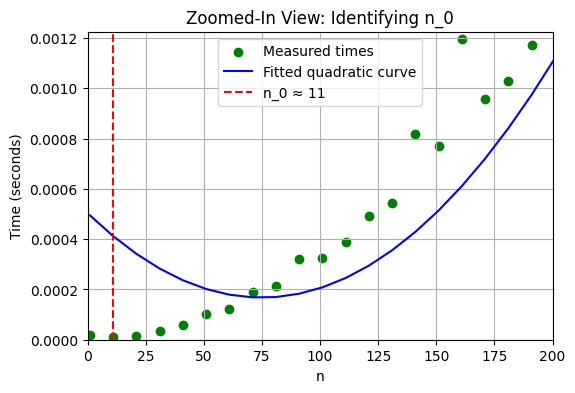

11

In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def f(n):
    x = 1
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            x += 1
    return x


n_values = np.arange(1, 500, 10)
times = []

for n in n_values:
    start_time = time.time()
    f(n)
    end_time = time.time()
    times.append(end_time - start_time)


def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

params, _ = curve_fit(quadratic, n_values, times)


plt.figure(figsize=(6, 4))
plt.scatter(n_values, times, label="Measured times", color='green')
plt.plot(n_values, quadratic(n_values, *params), label="Fitted quadratic curve", color='blue')


n_0 = None
for i in range(1, len(n_values)):
    if abs(times[i] - quadratic(n_values[i], *params)) > 1.5 * np.mean(times[:5]):
        n_0 = n_values[i]
        break


if n_0:
    plt.axvline(n_0, color='red', linestyle='--', label=f"n_0 ≈ {n_0}")

plt.xlim(0, 200)
plt.ylim(0, max(times[:15]) * 1.5)
plt.xlabel("n")
plt.ylabel("Time (seconds)")
plt.title("Zoomed-In View: Identifying n_0")
plt.legend()
plt.grid()
plt.show()


n_0